Last update: 1/11/2017

**1. Import datasets & packages**

In [33]:
import numpy as np
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

**2. Some EDA**

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Check data type

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


This only contains summary for numerical columns:

In [38]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This would have other columns which are "object":

In [39]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nye, Mrs. (Elizabeth Ramell)",male,347082,B96 B98,S
freq,1,577,7,4,644


**3. Clean data**

Check if there's missing value. Looks like there are missing values in "Age", "Cabin", and " Embarked". However, since I don't think "Embarked" and "Cabin" have a lot of impact on the chance of survival, I will only fill missing values for "Age", and remove "Embarked" and "Cabin" in the end.

In [40]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

For "Age" column, first plot histogram to see the skewness of the distribution. Looks like it's a little right skewed, so the best way to fill missing values might be using the median instead of mean.

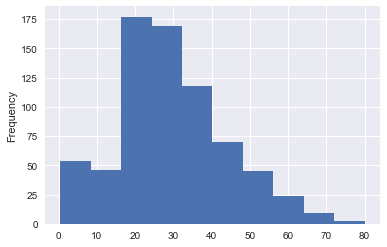

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
train_df['Age'].plot(kind='hist')

In [42]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

Drop the columns that will not be used for modeling.

In [43]:
train_df.drop(['PassengerId','Name','Ticket','Embarked','Cabin'], axis=1,inplace=True)

Check if test_df has missing values, and fill missing values. Drop unused columns too.

In [44]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [45]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

In [46]:
test_df.drop(['Name','Ticket','Embarked','Cabin'], axis=1,inplace=True)

**4. Check correlation between variables**

Sex vs Survived. As we can see from the bar chart, the survival rate of female is much higher than male.

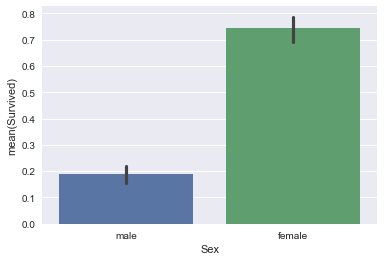

In [47]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=train_df)

Pclass vs Survived. The higher the class, the higher the survival chance.

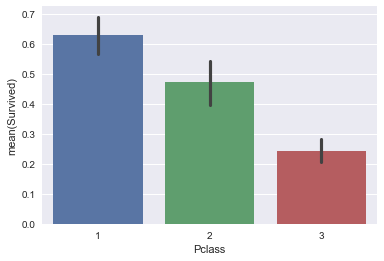

In [48]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Heatmap

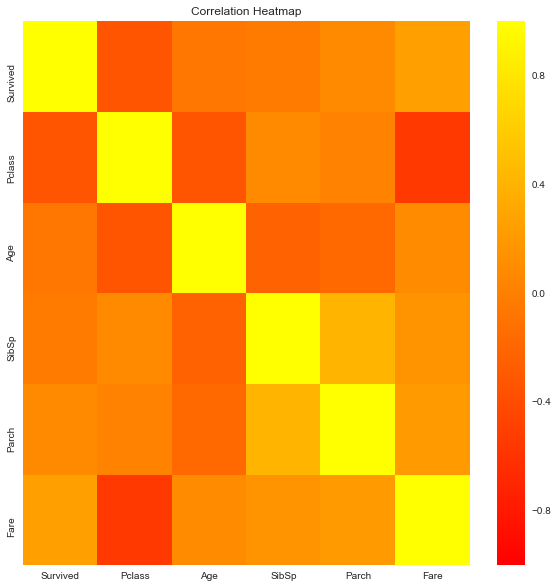

In [49]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='autumn')

**5. Build prediction model**

In [50]:
import statsmodels.formula.api as sm

Check linear model first. Clearly, linear model would not fit since we are only expecting 2 outcomes (0 or 1).

In [51]:
lm = sm.ols(formula='Survived~Pclass+Sex+Age+SibSp+Parch+Fare', data=train_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     96.06
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           6.73e-93
Time:                        16:14:15   Log-Likelihood:                -398.33
No. Observations:                 891   AIC:                             810.7
Df Residuals:                     884   BIC:                             844.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2981      0.070     18.526      0.000       1.161       1.436
Sex[T.male]    -0.5125      0.028    -18.341      0.000      -0.567      -0.458
Pclass         -0.1707      0.020     -8.649      0.000      -0.209      -0.132
Age            -0.0058      0.001     -5.428      0.000      -0.008      -0.004
SibSp          -0.0436      0.013     -3.340      0.001      -0.069      -0.018
Parch          -0.0191      0.018     -1.055      0.292      -0.055       0.016
Fare            0.0004      0.000      1.274      0.203      -0.000       0.001
==============================================================================
Omnibus:                       38.718   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.807
Skew:                           0.534   Prob(JB):                     5.06e-10
Kurtosis:                       3.114   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Logistic regression model. To use logistic regression model, categorical columns should be changed to numerical value. So changing Sex to 0 or 1.

In [52]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [53]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.80022446689113358

Decision tree model.

In [55]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred2 = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train)

0.97979797979797978

K-NN model.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() 
knn.fit(X_train,Y_train)
Y_pred3=knn.predict(X_test)
knn.score(X_train, Y_train)

0.80808080808080807

Decision Tree > KNN > Logistic Regression. However, the scores I got for submission are Logistic Regression > KNN > Decision Tree. So I will stay using Logistic Regression for now.

**6. Submission file**

In [57]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred1
    })
submission.to_csv('submission.csv', index=False)